<a href="https://colab.research.google.com/github/zainabhameed24/Zainab-Hameed_Intership_of_Developer-_Hub_Corporations_Tasks/blob/main/Internship_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3: Customer Churn Prediction (Bank Customers)**
Objective: Identify customers who are likely to leave the bank.

Dataset: Churn Modelling Datase

# **Clean and prepare the dataset.**

● Encode categorical features such as geography and gender.


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/Churn_Modelling.csv")
print(df.head(2))
# Drop unnecessary columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encode 'Gender'
df['Gender'] = df['Gender'].astype('category').cat.codes

# One-hot encode 'Geography'
data_onehot = pd.get_dummies(df['Geography'], prefix='Geography')

# Combine with original DataFrame
df = pd.concat([df.drop(columns=['Geography']), data_onehot], axis=1)

# View result
print(df.head())
print(df.info())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  E

# **Explanation**

This dataset is about bank customers and whether they left the bank (Exited). It includes details like age, gender, country, credit score, balance, and salary. Features such as IsActiveMember and HasCrCard help understand customer behavior. The goal is to predict churn (1 = left, 0 = stayed) based on these features.

**Train a classification model.**

In [3]:
#Split data and train a classification model
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']               # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print classification report
print(" Classification Report:")
print(classification_report(y_test, y_pred))

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



**Explanation**

This classification report shows how well the model predicts customer churn. It correctly identifies 96% of non-churners (class 0) but only 47% of churners (class 1). Overall accuracy is 87%, meaning the model is right 87% of the time. However, it performs better on customers who stayed than those who left.

Analyze feature importance to understand what influences churn.

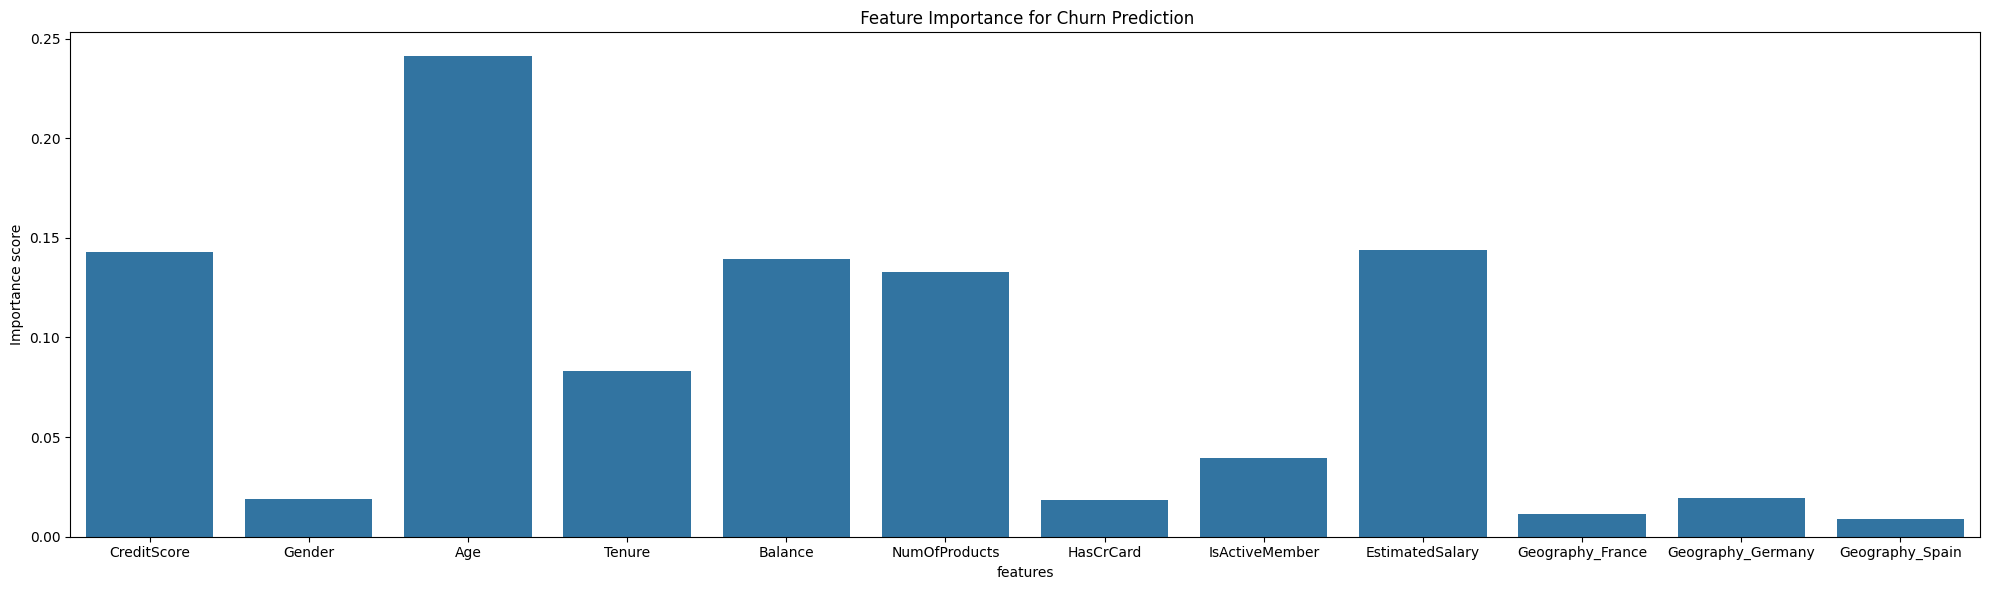

In [4]:
#Analyze feature importance
importances = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(20, 6))
sns.barplot(x=features, y=importances)
plt.title(" Feature Importance for Churn Prediction")
plt.xlabel("features")
plt.ylabel("Importance score")
plt.tight_layout()
plt.show()

# **Explanation**
This bar chart shows which features (columns) are most important for predicting customer churn using a machine learning model.

Age is the most important factor — older customers are more likely to leave.

CreditScore, Balance, EstimatedSalary, and NumOfProducts also have a strong influence.

Gender, HasCrCard, and Geography have very little impact on the prediction.

The model learns from these features to decide whether a customer will stay or leave